### Assignment 9 - Anomaly Detection using machine learning

### Data Preprocessing and feature engineering



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
print("Train data info:")
train.info()


Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [16]:
print("Test data info:")
test.info()

Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3960 non-null   int64  
 1   value      3960 non-null   float64
 2   predicted  3960 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 92.9 KB


In [18]:
# Check for missing values
print("Missing values in train data:\n", train.isnull().sum())
print("Missing values in test data:\n", test.isnull().sum())

Missing values in train data:
 timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64
Missing values in test data:
 timestamp    0
value        0
predicted    0
dtype: int64


In [20]:
# Drop rows with missing values if any (adjust this based on the dataset)
train.dropna(inplace=True)
test.dropna(inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


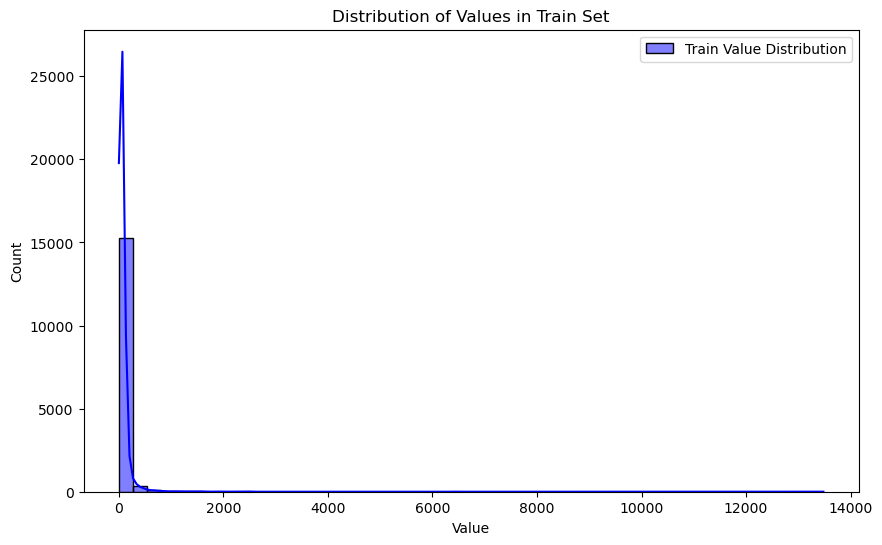

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(train['value'], kde=True, bins=50, color='blue', label='Train Value Distribution')
plt.title('Distribution of Values in Train Set')
plt.xlabel('Value')
plt.legend()
plt.show()


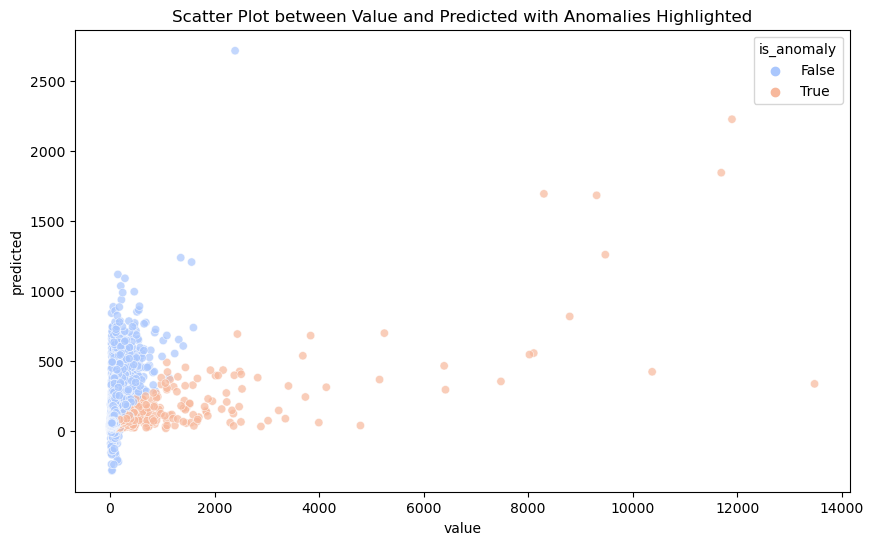

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='value', y='predicted', hue='is_anomaly', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot between Value and Predicted with Anomalies Highlighted')
plt.show()


In [26]:
X_train = train[['value', 'predicted']]
y_train = train['is_anomaly'].astype(int)  # Convert to integer if necessary

X_test = test[['value', 'predicted']]


In [28]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Modeling: Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # Contamination is based on the expected anomaly ratio
model.fit(X_train_scaled)


IsolationForest(contamination=0.01, random_state=42)

In [32]:
# Predicting on the training set
train['predicted_anomaly'] = model.predict(X_train_scaled)
train['predicted_anomaly'] = np.where(train['predicted_anomaly'] == -1, 1, 0)  # -1 = anomaly, 1 = normal

In [34]:
# 5. Model Evaluation on the training set
print("Training Set Evaluation:\n", classification_report(y_train, train['predicted_anomaly']))

Training Set Evaluation:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     15054
           1       0.57      0.12      0.19       776

    accuracy                           0.95     15830
   macro avg       0.76      0.56      0.58     15830
weighted avg       0.94      0.95      0.94     15830



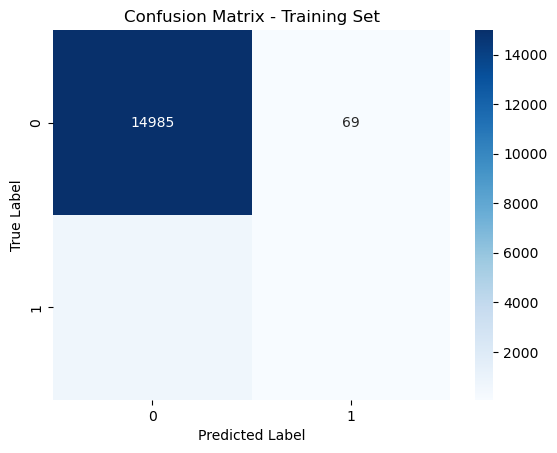

In [36]:
# Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_train, train['predicted_anomaly'])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Training Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
#  Apply Model to Test Set
test['predicted_anomaly'] = model.predict(X_test_scaled)
test['predicted_anomaly'] = np.where(test['predicted_anomaly'] == -1, 1, 0)

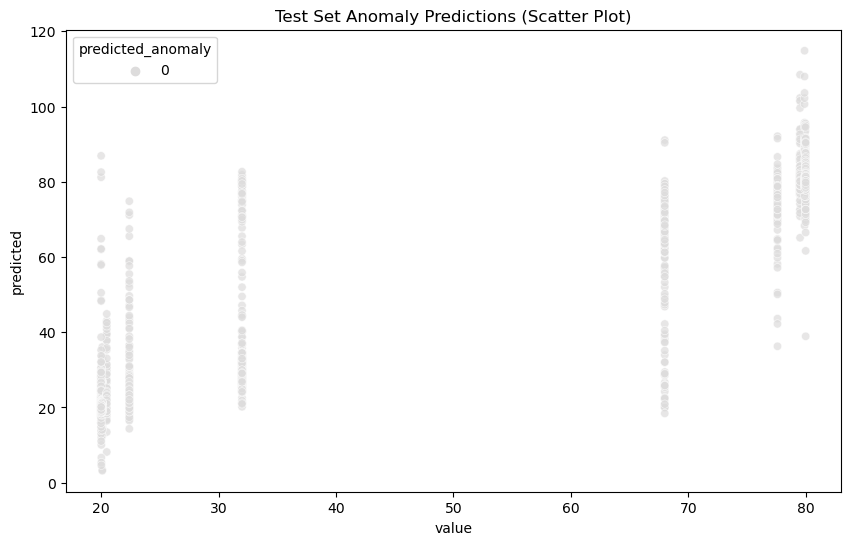

In [40]:

# Visualizing Test Set Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test, x='value', y='predicted', hue='predicted_anomaly', palette='coolwarm', alpha=0.7)
plt.title('Test Set Anomaly Predictions (Scatter Plot)')
plt.show()

In [42]:
test.to_csv('test_with_anomaly_predictions.csv', index=False)
print("Test set predictions saved to 'test_with_anomaly_predictions.csv'")

Test set predictions saved to 'test_with_anomaly_predictions.csv'
